In [1]:
#import requred packages and data to be cleaned
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('medical_clean.csv',dtype={'CaseOrder':np.int64})

In [2]:
#create index for dataset
df.rename(columns={'Unnamed: 0':'index'}, inplace=True)
df['index'] = pd.Series(range(0,10000))

In [3]:
#View Stats for variables
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,index
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700,4999.50000
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312,2886.89568
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2499.75000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4999.50000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,7499.25000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9999.00000


In [4]:
#Correlation between variables 
df.corr()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,index
CaseOrder,1.000000,0.013361,-0.009584,-0.015578,0.008746,0.014226,0.001622,-0.015451,-0.009987,-0.004856,...,0.001971,-0.017419,-0.006881,-0.009152,-0.014291,-0.004005,-0.006463,0.004512,-0.015478,1.000000
Zip,0.013361,1.000000,-0.029327,-0.900683,0.030955,0.011065,-0.005960,0.009404,-0.003151,0.000838,...,0.003490,-0.005756,-0.002297,-0.009235,-0.001498,0.004776,0.001881,-0.004036,-0.013274,0.013361
Lat,-0.009584,-0.029327,1.000000,-0.112348,-0.207572,0.006373,-0.007270,-0.019369,0.001493,0.008380,...,-0.002283,0.008614,0.007413,0.014326,-0.015594,-0.001424,0.010723,0.009641,0.001733,-0.009584
Lng,-0.015578,-0.900683,-0.112348,1.000000,-0.031979,-0.014114,0.007493,-0.006665,-0.006389,0.000754,...,0.000079,0.004805,-0.002523,-0.000800,0.003508,-0.003296,-0.007443,0.001077,0.009253,-0.015578
Population,0.008746,0.030955,-0.207572,-0.031979,1.000000,0.002462,-0.018987,0.005426,0.002651,0.012646,...,-0.004820,0.014312,0.023612,-0.001248,-0.004660,0.008705,0.008159,0.010034,-0.000220,0.008746
Children,0.014226,0.011065,0.006373,-0.014114,0.002462,1.000000,0.009836,0.007176,0.009487,-0.002292,...,0.013548,0.002138,0.001674,-0.002094,0.000728,0.012564,-0.008546,0.004156,-0.019753,0.014226
Age,0.001622,-0.005960,-0.007270,0.007493,-0.018987,0.009836,1.000000,-0.012228,0.010315,0.006898,...,0.716854,0.005552,0.003967,0.004709,0.003377,-0.008827,-0.002087,0.009423,-0.003367,0.001622
Income,-0.015451,0.009404,-0.019369,-0.006665,0.005426,0.007176,-0.012228,1.000000,-0.013115,0.013464,...,-0.009825,-0.003494,-0.008182,-0.003782,-0.004301,-0.010642,0.001021,-0.000502,0.021178,-0.015451
VitD_levels,-0.009987,-0.003151,0.001493,-0.006389,0.002651,0.009487,0.010315,-0.013115,1.000000,0.010210,...,0.008290,0.013711,0.003979,-0.012103,-0.009872,0.006605,0.006887,-0.009832,-0.021074,-0.009987
Doc_visits,-0.004856,0.000838,0.008380,0.000754,0.012646,-0.002292,0.006898,0.013464,0.010210,1.000000,...,0.008072,0.003680,0.006024,-0.002718,-0.006538,-0.009434,0.012530,0.008589,0.004571,-0.004856


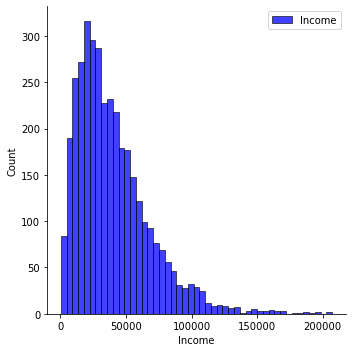

In [5]:
#View income level and positive readmission
ax1 = sns.displot(df.loc[df['ReAdmis'] == 'Yes', 'Income'], color='blue',label='Income')
plt.legend()
plt.show()

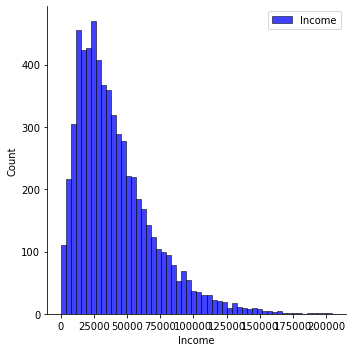

In [6]:
#Income and negative readmission
ax1 = sns.displot(df.loc[df['ReAdmis'] == 'No', 'Income'], color='blue',label='Income')
plt.legend()
plt.show()

<AxesSubplot:xlabel='ReAdmis'>

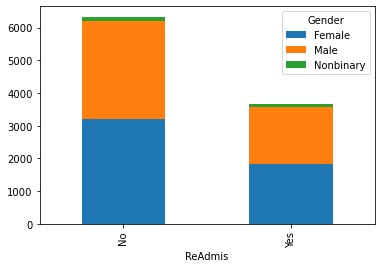

In [7]:
#stacked chart of readmisssions and gender
tbl = pd.pivot_table(df.groupby(['ReAdmis','Gender']).size().reset_index(),
                    values=0,
                    index='ReAdmis',
                    columns=['Gender'],
                    aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

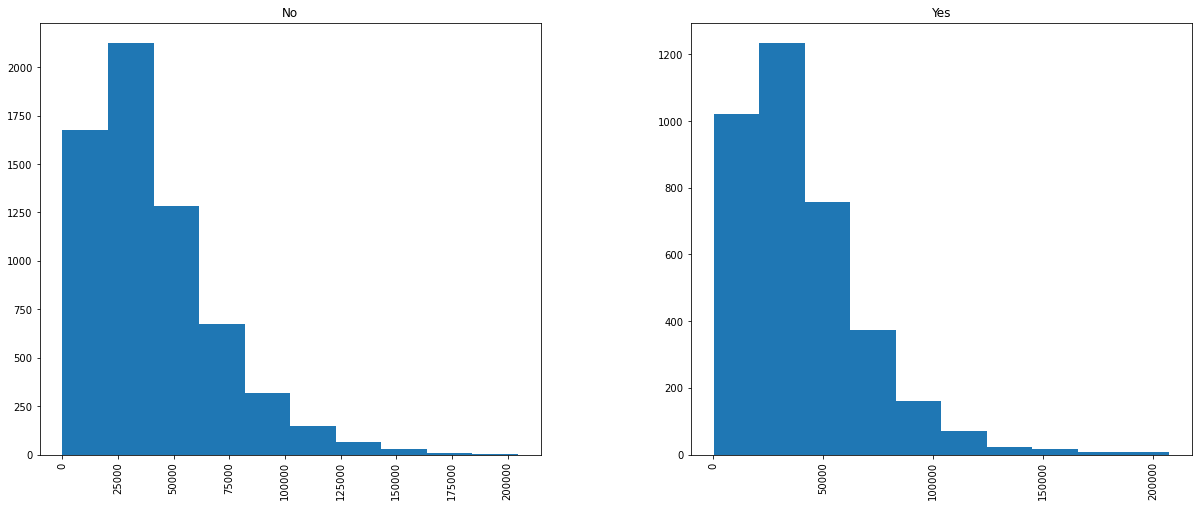

In [8]:
#Seperate ReAdmission by Income
df.hist(column='Income', by='ReAdmis', figsize=(20,8))

In [9]:
#Perform T-test of ReAdmins and Income
ReAd = df.loc[df['ReAdmis'] == 'Yes', 'Income']
NoReAd = df.loc[df['ReAdmis'] == 'No', 'Income']
print(ttest_ind(ReAd, NoReAd))

Ttest_indResult(statistic=-1.1503460734711837, pvalue=0.25002887450052586)


In [10]:
PopyReAd = df.loc[df['ReAdmis'] == 'Yes', 'Population']
PopnReAd = df.loc[df['ReAdmis'] == 'No', 'Population']
print(ttest_ind(PopyReAd, PopnReAd))

Ttest_indResult(statistic=2.0041762169089465, pvalue=0.04507811030342384)


<AxesSubplot:>

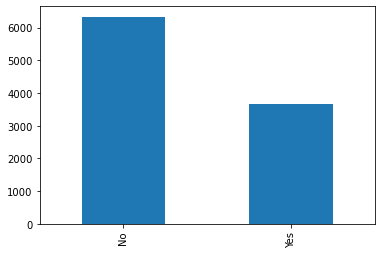

In [11]:
#Univariate Categorical Data
df['ReAdmis'].value_counts().plot(kind='bar')

<AxesSubplot:>

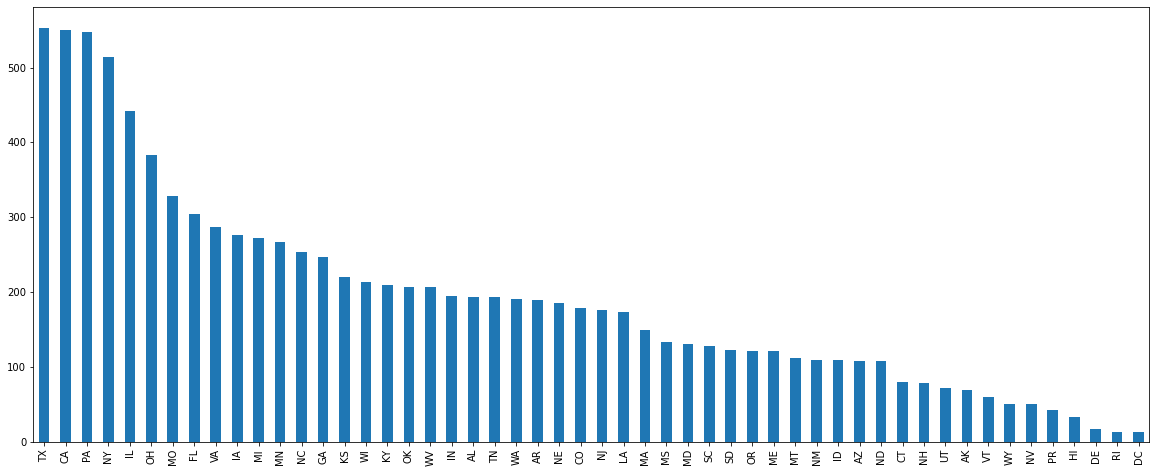

In [12]:
#Univariate Categorical Data
df['State'].value_counts().plot(kind='bar', figsize=(20,8))

(array([7.328e+03, 1.203e+03, 7.630e+02, 3.950e+02, 1.860e+02, 7.500e+01,
        2.600e+01, 1.800e+01, 4.000e+00, 2.000e+00]),
 array([     0. ,  12281.4,  24562.8,  36844.2,  49125.6,  61407. ,
         73688.4,  85969.8,  98251.2, 110532.6, 122814. ]),
 <BarContainer object of 10 artists>)

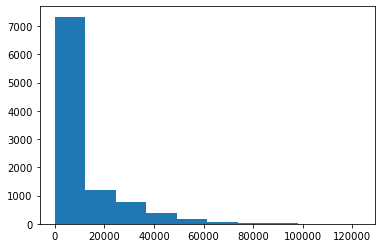

In [13]:
#Univariate Continuous Data
plt.hist(df['Population'])

(array([2727., 3369., 2032., 1038.,  470.,  206.,   85.,   47.,   14.,
          12.]),
 array([1.54080000e+02, 2.08635820e+04, 4.15730840e+04, 6.22825860e+04,
        8.29920880e+04, 1.03701590e+05, 1.24411092e+05, 1.45120594e+05,
        1.65830096e+05, 1.86539598e+05, 2.07249100e+05]),
 <BarContainer object of 10 artists>)

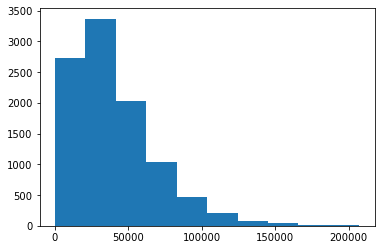

In [14]:
#Univariate Continuous Data
plt.hist(df['Income'])

<AxesSubplot:xlabel='Population', ylabel='Income'>

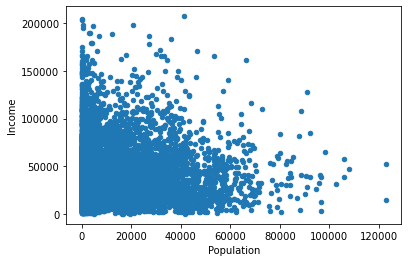

In [15]:
#Bivariate Continuous Data
df.plot(kind='scatter', x='Population', y='Income')

In [16]:
#Bivariate Categorical data
BiV1= df.groupby(['State','ReAdmis'])
BiV1.size()

State  ReAdmis
AK     No          46
       Yes         24
AL     No         117
       Yes         77
AR     No         120
                 ... 
WI     Yes         84
WV     No         138
       Yes         69
WY     No          34
       Yes         17
Length: 104, dtype: int64